# Maximum Likelihood & Gradient Descent

## Intro to Maximum Likelihood
The method of Maximum Likelihood Estimation (MLE) is a technique for determining estimates for model parameters from data.

Typically, you choose some model with parameters, $\theta_j$, that you believe explains your data. MLE is then used to find the parameter values that maximise the likelihood that the process described by the model generates the data that was actually observed.

This may sound a little abstract, but we will demonstrate how this works with a simple case.

A gradient descent example

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from IPython.display import Latex

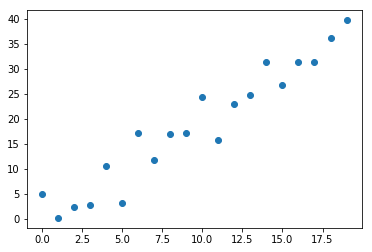

In [6]:
#Create straight line with errors - intercept through zero
n=20
x=np.arange(0,n,1)
rand=np.random.RandomState(1)
y=2.*x+rand.normal(scale=3.,size=n)
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

We have taken the data above, making a measurement $y$ and each point $x$. Our inclination (maybe informed by our theoretical understanding of the physics) suggests the data should obey a straight line. However, when we make measurements their is always some source of noise that will influence our measurements and add uncertaintity. In this case, we assume that the noise in our experiment follows a Gaussian (Normally) distribution. 

As a reminder, the Normal distribution is given by:
$$
P(x:\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2} \right\}
$$

So, we want to describe our data with a model, hence we need to determine the parameters of a straight line model, $y=\theta_0+\theta_1x$. The question is, how to we find line of best fit to the data?

The way forward to is to frame the question in terms of probability. 

First, we believe the data is $x$ from a straight line where the errors on $y$ values are Normally distributed. Hence, assuming we know the parameter values for the model, then we expect the errors on the y-values will be generated from the Normal distribution with probability $P$.

However, we don't know the parameter values. So, we need to find the best estimates for the parameters values such that the observed $y$'s, $y_{obs}$, minus the predicted $y$'s from the model, $y_{mod}$, provide us with residuals that are normally distributed.

$$
\mathcal{L}=\prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma}exp\left\{-\frac{(y_{obs,i}-y_{mod})^2}{2\sigma^2} \right\}
$$
Typically we use the log-likelihood (due to multiplication of potentially small probabilities), which leaves us with
$$
-2 ln \mathcal{L}=\frac{(y_{obs,i}-y_{mod})^2}{\sigma^2}=\chi^2
$$

.
.
.
.
Hence we want to minimise $\chi^2$

Text(0,0.5,'$\\chi^2$')

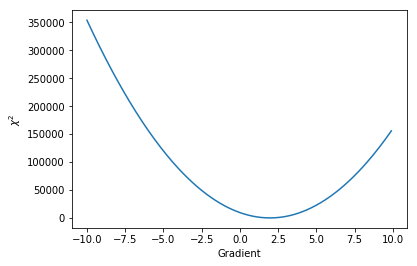

In [33]:
def calc_chisq(yobs,x,param):
    ymod=param[0]+x*param[1]
    chi_sq=(ymod-yobs)**2
    return chi_sq.sum()

grid_range=[-10,10]
step=0.1
ngrid=np.arange(grid_range[0],grid_range[1],step)
chisq_grad=np.zeros( len(ngrid))

j=0
for ii in ngrid:
 
    param=np.array([0.,ii])
    chisq_grad[j]=calc_chisq(y,x,param)
    j+=1
    
plt.plot(ngrid,chisq_grad)
plt.xlabel("Gradient")
plt.ylabel("$\chi^2$")

$$
\theta_j:=\theta_j-\alpha\frac{d \chi^2 }{d\theta_j}
$$

In [31]:
# Gradient descent function
def grad_desc(yobs,x,start,**kwargs):
    alpha = kwargs.pop('alpha', 1e-4)
    tol=kwargs.pop('tol',1e-3)
    iter_max=kwargs.pop('iter_max',1000)
    
    new_val=np.zeros(iter_max)
    new_val[0]=start
    old_val=start+10
    iter=0
    while np.abs(old_val - new_val[iter]) > tol:
        old_val=new_val[iter]
        diff=-alpha*2.*(x*old_val-yobs)*x
        new_val[iter+1]=old_val+diff.sum()
        iter+=1
        if iter ==iter_max:
            break
            
    print("Iterations taken",iter)    
    return new_val[:iter]
    
vals=grad_desc(y,x,-7,tol=1e-4)

Iterations taken 17


In [32]:
print(vals)

[-7.         -2.57251693 -0.3322105   0.80138456  1.37498365  1.6652248
  1.81208681  1.886399    1.92400096  1.94302755  1.95265501  1.9575265
  1.95999148  1.96123876  1.96186988  1.96218923  1.96235082]


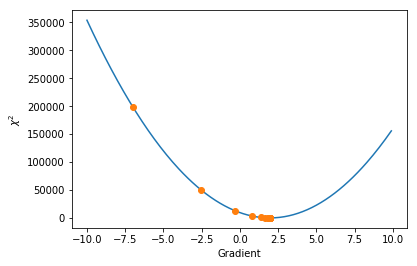

In [37]:
chisq_vals_GD=np.zeros(len(vals))
for ii in np.arange(0,len(vals),1):
    chisq_vals_GD[ii]=calc_chisq(y,x,[0,vals[ii]])

plt.plot(ngrid,chisq_grad)
plt.xlabel("Gradient")
plt.ylabel("$\chi^2$")
plt.plot(vals,chisq_vals_GD,'o')